<a href="#Overview"></a>
# Overview
* <a href="#7a29b840-04a1-425a-bd43-6a439f488f6c">Introduction</a>
  * <a href="#238dd27f-957b-4cd4-ac80-322b3356facf">Key concepts</a>
    * <a href="#a76ae146-cb60-4e94-90fe-5a38511f1af6">Nengo classes</a>
    * <a href="#a0e1924f-fff7-4105-ac7e-50ad790f425d">Python basics</a>
* <a href="#a202d0ff-541b-4c39-92a5-40835d6eaf4c">Load Packages</a>
* <a href="#8d786d7e-e856-492f-8313-21e798120826">Part 1: A simple neuron</a>
  * <a href="#ac412cc5-06e4-4d54-8b10-1959ea83b39c">Exercise 1: Create the Neuron</a>
  * <a href="#1646e613-fb5b-459f-9a5e-d50fe70b9a0f">Context managers</a>
  * <a href="#f7ddf115-16c6-4758-a5ce-05a471d52034">Exercise 2: Provide Input to the Model</a>
  * <a href="#f0e58854-01d1-4109-9300-cded2a6b1bdb">Exercise 3: Connect the Network Elements</a>
  * <a href="#da4fd10c-14fe-40da-95b5-cebbb89fded0">Exercise 4: Add Probes</a>
  * <a href="#e70b7127-c0a9-41a8-8bc7-a433a9d4d205">Exercise 5: Run the Model</a>
  * <a href="#2801bbb4-c5fe-4622-acf0-6408c738c552">Exercise 6: Plot the Results</a>
* <a href="#7db5288c-bd6d-4707-a9c5-ef2a8ee35d4b">Part 2: Simulating feedforward inhibition circuit in the cerebellar cortex</a>
  * <a href="#61ed97c9-e2cc-4637-aa82-a4fa5c63442a">Exercise 7: Creating the model</a>
  * <a href="#8b75dbbe-0145-473f-b235-ff13b7460723">Exercise 8: Provide input to the model</a>
  * <a href="#4e598600-e7f7-4123-b146-0c96489f8b49">Exercise 9: Connect elements in the circuit</a>
  * <a href="#5c7e7876-8c29-4945-a2c6-8c7a1be7c41c">Exercise 10: Probe output</a>
  * <a href="#2a8987fb-9bc1-4e98-8ddf-1f66ff351b34">Exercise 11: Plotting the data</a>
* <a href="#eb17f014-cc8b-4ab8-886c-4dc1d8c2f642">Part 3: Memory Circuit</a>
  * <a href="#1757bc3a-b820-4e9b-97c7-3a2aa3e6185a">Exercise 12: Making the Model</a>
  * <a href="#00f9df0c-4ef1-461c-83c8-d8363ba51517">Exercise 13: Plotting that data</a>

<a id="7a29b840-04a1-425a-bd43-6a439f488f6c"></a>
# Introduction
<a href="#Overview">Return to overview</a>
Today we're going to play around a little bit with a neural network modeling software called nengo. It's a nice and flexible package that can simulate either very small (eg, 1 or 2 neuron) networks or very large networks. We'll mostly focus on the small end today. 

In addition to the specifics of running simulations, this will be an opportunity to become familiar with using a third-party software package with a bit of a learning curve.

This software runs directly from your python interpreter, but the first thing we'll need to do is install some packages.

If you haven't already installed nengo, do it now:

    conda install nengo nengo-gui
    
Nengo also comes with a web-based graphical user interface (GUI) that shows the activity of the network in real time. Let's take a brief moment to look at an example. You can launch the GUI via your Anaconda Prompt by typing:

    nengo
    
Feel free to play around with the GUI on your own, but for the purpose of today's lesson we're going to run nengo code directly in this notebook.

What are the basic elements of a neural network? Well, neurons of course! And synapses, and external stimulus inputs. Luckily, if we can figure out how to generate those as python objects in the nengo code and string them up together, the backend code will do all the hard work for us (setting encoder weights so the neuron populations compute the functions we ask them to). If you want to read more about how this works take a look at [this paper](http://compneuro.uwaterloo.ca/files/publications/stewart.2012d.pdf).

<a id="238dd27f-957b-4cd4-ac80-322b3356facf"></a>
## Key concepts
<a href="#Overview">Return to overview</a>

<a id="a76ae146-cb60-4e94-90fe-5a38511f1af6"></a>
### Nengo classes
<a href="#Overview">Return to overview</a>

* `Network` - a collection of neurons that make up a full simulaiton
* `Ensemble` - one or more neurons with a similar configuration, eg, neurons belonging to one layer of a network
* `Node` - inputs to a network (eg, stimuli)
* `Connection` - connection between ensembles (synaptic weights, that kind of thing)
* `Probe` - a signal that gets monitored during the simulation (think of it as an electrode poked into the simulated network)

<a id="a0e1924f-fff7-4105-ac7e-50ad790f425d"></a>
### Python basics
<a href="#Overview">Return to overview</a>
* `with` - perform operations in a context
* `lambda` - on the fly functions

<a id="a202d0ff-541b-4c39-92a5-40835d6eaf4c"></a>
# Load Packages
<a href="#Overview">Return to overview</a>


In [ ]:
#  pip install nengo

In [2]:
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.utils.matplotlib import rasterplot
from nengo.dists import Uniform

<a id="8d786d7e-e856-492f-8313-21e798120826"></a>
# Part 1: A simple neuron
<a href="#Overview">Return to overview</a>


<a id="ac412cc5-06e4-4d54-8b10-1959ea83b39c"></a>
## Exercise 1: Create the Neuron
<a href="#Overview">Return to overview</a>


Let's make a neuron, everyone! 

Not so fast. First, we need to make a model for our neuron to live in. We do this using the `Network` function in the `nengo` package. Pull up the documentation and see what arguments `Network` takes.

In [3]:
nengo.Network?


Init signature: nengo.Network(label=None, seed=None, add_to_container=None)
Docstring:     
A network contains ensembles, nodes, connections, and other networks.

A network is primarily used for grouping together related
objects and connections for visualization purposes.
However, you can also use networks as a nice way to reuse
network creation code.

To group together related objects that you do not need to reuse,
you can create a new ``Network`` and add objects in a ``with`` block.
For example:

.. testcode::

   network = nengo.Network()
   with network:
       with nengo.Network(label="Vision"):
           v1 = nengo.Ensemble(n_neurons=100, dimensions=2)
       with nengo.Network(label="Motor"):
           sma = nengo.Ensemble(n_neurons=100, dimensions=2)
       nengo.Connection(v1, sma)

To reuse a group of related objects, you can create a new subclass
of ``Network``, and add objects in the ``__init__`` method.
For example:

.. testcode::

   class OcularDominance(nengo.Network)

For the time being, we are only interested in specifying a label for our network. Create an object called model and, using `Network`, label it 'A Single Neuron'. 

In [62]:
# %load "answers/answer_001.txt"
# Answer
model = nengo.Network(label = 'A Single Neuron')

In [7]:
model.label

'A Single Neuron'

Now, we get to specify all the features of our model.

First, the neuron! In order to make our precious brain cell, we will need to generate and instance of the `nengo` object `Ensemble`. Let's take a look at the documentation and see what parameters we can input.

In [9]:
# %load "answers/answer_002.txt"
# Answer
nengo.Ensemble?

Init signature: nengo.Ensemble(*args, **kwargs)
Docstring:     
A group of neurons that collectively represent a vector.

Parameters
----------
n_neurons : int
    The number of neurons.
dimensions : int
    The number of representational dimensions.

radius : int, optional
    The representational radius of the ensemble.
encoders : Distribution or (n_neurons, dimensions) array_like, optional
    The encoders used to transform from representational space
    to neuron space. Each row is a neuron's encoder; each column is a
    representational dimension.
intercepts : Distribution or (n_neurons,) array_like, optional
    The point along each neuron's encoder where its activity is zero. If
    ``e`` is the neuron's encoder, then the activity will be zero when
    ``dot(x, e) <= c``, where ``c`` is the given intercept.
max_rates : Distribution or (n_neurons,) array_like, optional
    The activity of each neuron when the input signal ``x`` is magnitude 1
    and aligned with that neuron's 

Wow, so many fun things to do with a fake neuron! 

The only parameters that we need to specify (because they don't default to any convenient values) are the number of neurons in our model, as well as the dimension of the ensemble. Those seem like important places to start, but what do they mean exactly? Let's see if we can start to get a sense.

Do you notice how the docuementation says that an ensemble is "A group of neurons that collectively represent a vector?" Nengo neurons are just like real neurons in the sense that they each have a tuning curve. That means that they have a preferred stimulus that they like to fire in response to, and there is a range of stimuli for which each neuron is responsive or silent. This is an illustration of tuning curves for an example nengo model. 

![image.png](tuning_curves.png)

If you are curious to know more, check out [this example](https://www.nengo.ai/nengo/examples/usage/tuning-curves.html) These tuning curves on individual neurons allow the /population/ to collectively represent an input value based on which neurons fire in response to it. This value can be thought of as a vector. Throwing it back to high school math class, a vector can be thought of as an arrow with a length and a direction, but it can also be thought of as simply a series of numerical values collected into 1 object using square brackets. 

$$[x_1 x_2 ... x_m]$$

This will be the most useful image to keep in mind in this situation. The dimension of the vector is simply the number of entries it has. Since the values nengo ensembles know how to represent are vectors, we have to set the dimension of the ensemble to the dimension of the stimuli we're going to be feeding it.

For all this talk about collective representation, we can still do things with a single spiking neuron in nengo. To get started, let's create an object in the model called `single` that represents *one* neuron. One neuron can only represent one value at a time so we better specify that it is *one* dimensional. 

So here's our first attempt at creating an ensemble:

In [10]:
single = nengo.Ensemble(n_neurons=1, dimensions=1)

NetworkContextError: '<Ensemble (unlabeled) at 0x10daf0200>' must either be created inside a ``with network:`` block, or set add_to_container=False in the object's constructor.

What's going on?  We've encountered a somewhat quirky feature of nengo, called the "context manager protocol" which gives it a learning curve, but in the end gives it a high degree of flexibility.

Let's start with an example which specifies everything we need for a basic single neuron.

In [11]:
with model:
    single = nengo.Ensemble(n_neurons=1, dimensions=1)

In the simulation, each neuron in the ensemble will have randomly generated properties that fall in a range specified by various parameters. For example, this is the range of max firing rates

In [12]:
single.max_rates

Uniform(low=200, high=400)

In [13]:
single.intercepts

Uniform(low=-1.0, high=0.9)

The other parameters we will specify are the firing intercepts (thresholds), maximum firing rates (Hz) and whether the neuron will increase its firing rate with positive or negative input. These are the parameters.

```
intercepts = Uniform(-.5, -.5),
max_rates = Uniform(100, 100),
encoders = [[1]]
```
 
Modify the call to `nengo.Ensemble` to create an ensemble `single` with these properties. As above, this should be embedded in a `with model:` operation (more on that below):

In [63]:
# %load "answers/answer_003.txt"
with model:
    # Answer
    single = nengo.Ensemble(n_neurons=1, dimensions=1,
                            intercepts = Uniform(-.5, -.5),
                            max_rates = Uniform(100, 100),
                            encoders = [[1]])

In [20]:
single.max_rates

Uniform(low=100, high=100)

<a id="1646e613-fb5b-459f-9a5e-d50fe70b9a0f"></a>
## Context managers
<a href="#Overview">Return to overview</a>

We're going to introduce a new Python feature known as a *context manager*. It's called the `with` statement and is as simple as this:

    with expression:
        ...
        # All indented code is inside the with block
        
You can even do:

    with expression as variable:
        ...
        # Again, all indented code is inside the with block
        
What are `with` statements good for? They're *great* for doing some set-up and clean-up (also known as tear-down in programming parlance). You do this all the time. You come into lab and set up for an experiment, run the experiment and then clean up. If something bad happens during the experiment, you might forget to clean-up. The same is true with programming. Sometimes you need to do the following:

    1. Write code to do some set-up
    2. Write your custom algorithm
    3. Write code to do some tear-down
    
Steps 1 and 3 are *always* identical. Perhaps it's as simple as opening a file (step 1), writing to it (step 2) and being sure to close it (step 3):

    fh = open('filename.txt') # Step 1
    fh.write('Hello World!')  # Step 2
    fh.close()                # Step 3
    
If you use a `with` statement, then the above code can be simplified to:

    with open('filename.txt') as fh:
        fh.write('Hello World!')

As soon as you enter the block under the `with` line, it executes the set-up code (step 1 above). As soon as you exit the block under the `with` line, it executes the tear-down code (step 3). How does it know *what* set-up and tear-down code you want to run? That's handled by the developers and will vary on the object you're working with. In the example above, we are working with `file` objects (which are returned by the [`open`](https://docs.python.org/3/library/functions.html#open) function). The Python developers have decreed that the tear-down (i.e., exiting the `with` block) will always *close* the file. They could have just as easily decided that exiting the `with` block deletes the file.

One other note. **Step 3** is *always* executed regardless of error. Try the following two cells of code. The first will generate an error. Then, see whether the file was closed properly by running the cell block.

In [32]:
file = open('my_data.txt', 'w')
file.write('Hello World!')
file.write('The answer is: {}'.format(1/0))
file.close()

ZeroDivisionError: division by zero

In [33]:
print(file.closed)

False


Ok, now open the file in your browser. Does it at least have the first line, `Hello World!`? Oh ... that's because it never closed the file properly. If that line contained important data, you've lost it.

Now, reimplement it using a `with` statement:

    file = open('my_data.txt', 'w')
    file.write('Hello World!')
    file.write('The answer is: {}'.format(1/0))
    file.close()
    
What lines would be step 2? Yes, keep the line that causes an error since we are going to demonstrate the beauty of the `with` statement in ensuring things are cleaned up properly even when disaster strikes.

In [34]:
# %load "answers/answer_004.txt"
# Answer
with open('my_data.txt', 'w') as file:
    file.write('Hello World!')
    file.write('The answer is: {}'.format(1/0))

ZeroDivisionError: division by zero

In [35]:
print(file.closed)

True


Good! The file was closed properly. Now open it in your browser. *Phew*, we didn't lose all of our data after all.

Ok, working with files is just one example of the use of context managers. The addition of the `with` statement has spawned many creative uses. Let's briefly look at what Nengo does with context managers. In Nengo you can work with more than one network:

    model1 = nengo.Network(label='A single neuron')
    model2 = nengo.Network(label='A few neurons')
    model3 = nengo.Network('The full brain')
    
Now, when you are *adding* neurons (i.e., ensembles) to the network, how does the ensemble know what network it belongs to? If Python didn't have with statements, then you'd have to do something along these lines:

    from nengo.network import Network
    
    Network.context.append(model1)
    single = nengo.Ensemble(n_neurons=1, dimensions=1)
    Network.context.pop()
    
    Network.context.append(model2)
    a_few = nengo.Ensemble(n_neurons=3, dimensions=1)
    Network.context.pop()
    
    Network.context.append(model3)
    my_brain = nengo.Ensemble(n_neurons=86e9, dimensions=1)
    Network.context.pop()
    
Here, Nengo has a special list, `Network.context`, which tracks the network (i.e., model) we're currently working with. Each time we create a new `Ensemble`, Nengo checks to see what's currently in the list and adds the ensemble to that particular network. However, as you can see this is likely to be error-prone. What if you forget to run `Network.context.append` or `Network.context.pop`? Fortunately, Nengo has decided that using `Network` objects in `with` statements will always "set-up" by appending the network passed to the `with` statement to the `Network.context` list. Then, ensembles inside the `with` block will be able to query `Network.context` to see what network they should be adding themselves to. Then, once the block exits, Nengo ensures that the network is removed (i.e., `pop`ped from `Network.context`). Do the internals of how Nengo works seem a bit complicated? Sure, but the goal was to create a system that's easy to develop models under. Isn't the following a much cleaner approach?

    with model1:
        single = nengo.Ensemble(n_neurons=1, dimensions=1)
     
    with model 2:
        a_few = nengo.Ensemble(n_neurons=3, dimensions=1)
    
    with model_3:
        my_brain = nengo.Ensemble(n_neurons=86e9, dimensions=1)
        
Wait, why can't we do the following?

    nengo.Ensemble(n_neurons=1, dimensions=1, network=model1)
    
It's because the developers decided not to set up Nengo that way.

<a id="f7ddf115-16c6-4758-a5ce-05a471d52034"></a>
## Exercise 2: Provide Input to the Model
<a href="#Overview">Return to overview</a>


As lovely as our lone neuron is, we'd like it to have a little input. In neural networks, non-neuronal input cells are referred to as 'nodes'. Any guesses on the name of the function we will use to create this *Node*? Type in nengo.[your guess here] and see if you can find any relevant documentation. 

To do that, we need to run another `with model:` line of code. 

In [36]:
nengo.Node?

Init signature: nengo.Node(*args, **kwargs)
Docstring:     
Provide non-neural inputs to Nengo objects and process outputs.

Nodes can accept input, and perform arbitrary computations
for the purpose of controlling a Nengo simulation.
Nodes are typically not part of a brain model per se,
but serve to summarize the assumptions being made
about sensory data or other environment variables
that cannot be generated by a brain model alone.

Nodes can also be used to test models by providing specific input signals
to parts of the model, and can simplify the input/output interface of a
`~nengo.Network` when used as a relay to/from its internal
ensembles (see `~nengo.networks.EnsembleArray` for an example).

Parameters
----------
output : callable, array_like, or None
    Function that transforms the Node inputs into outputs,
    a constant output value, or None to transmit signals unchanged.
size_in : int, optional
    The number of dimensions of the input data parameter.
size_out : int, optio

As you can see, there are a ton of different ways we can modify our input node. The only mandatory parameter (and the only parameter we care about for right now) is the `output`. 

For this model, we would like our input node to generate a cosine wave. You might be thinking, "how in the world can we write a nice code that will conitnually calculate a cosine wave?! Won't we need some sort of function?!" We will. We're going to write a lambda expression to go inside of `nengo.Node()`. 

If you think waaaay back to bootcamp, you might remember that lambda expressions are just shorthand ways of defining a function in python. In this case, a lamba expression works particularly well because we can put it inside of our `Node()`. 

Let's do a quick practice of lambda expressions. Create a lambda expression that takes one argument, x, and multiplies it by 2. Save this function as `fn`. 

In [47]:
# %load "answers/answer_005.txt"
# Answer
fn = lambda x: x*2

In [48]:
fn(2)

4

In [42]:
def fn2(x):
    return x*2

fn(20), fn2(20)

(40, 40)

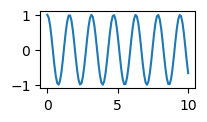

In [52]:
fn3 = lambda i: np.cos(i*4)

t = np.linspace(0,10,100)
x = fn3(t)
plt.figure(figsize=(2,1));
plt.plot(t,x)

Awesome work! Now, for the function we actually want. Create a lambda expression that takes one argument, 'i', and calculates the cosine of '8*i'. Save this expression as `fn`.  

*Hint: The cos() method isn't in our nengo toolkit, you'll need to look in one of our other favorite packages.* 

**Bonus**: Is there a way to label the input node? If you can find it, label your node 'Single Input'. 

In [53]:
# %load "answers/answer_006.txt"
with model:
    # Answer
    cos_input = nengo.Node(lambda i: np.cos(8 * i))
    
    # Bonus:
    cos_input = nengo.Node(lambda i: np.cos(8 * i), label='Single Input')

In [64]:
def cos_fn(i):
    return np.cos(8*i)

with model:
    # Answer
    cos_input = nengo.Node(cos_fn, label='Single Input')



In [68]:
model.all_ensembles[0].max_rates

Uniform(low=100, high=100)

<a id="f0e58854-01d1-4109-9300-cded2a6b1bdb"></a>
## Exercise 3: Connect the Network Elements
<a href="#Overview">Return to overview</a>


Next, let's put these two in touch. Any guesses what function we will use to make this *Connection*? 

Try it out. What do we need to add to the code below to connect our input and Ensemble?

*Hint: we only need two parameters - our input node and our neuron.* 

In [70]:
# %load "answers/answer_007.txt"
with model:
# Answer    
    nengo.Connection(cos_input, single)

In [71]:
model.all_connections

[<Connection at 0x10dd7b920 from <Node 'Single Input'> to <Ensemble (unlabeled) at 0x15a6fa120>>]

<a id="da4fd10c-14fe-40da-95b5-cebbb89fded0"></a>
## Exercise 4: Add Probes
<a href="#Overview">Return to overview</a>


Another critical `with model` step for our neural net is setting up a probe. Anything that is probed will collect the data it produces over time, allowing us to analyze and visualize it later.

Once again, `nengo` comes through with a very intuitive function name for our *Probe*. Try creating a probe for `cos_input`. 

In [72]:
nengo.Probe?

Init signature: nengo.Probe(*args, **kwargs)
Docstring:     
A probe is an object that collects data from the simulation.

This is to be used in any situation where you wish to gather simulation
data (spike data, represented values, neuron voltages, etc.) for analysis.

Probes do not directly affect the simulation.

All Nengo objects can be probed (except Probes themselves).
Each object has different attributes that can be probed.
To see what is probeable for each object, print its
``probeable`` attribute.

.. testcode::

   with nengo.Network():
       ens = nengo.Ensemble(10, 1)
   print(ens.probeable)

.. testoutput::

   ('decoded_output', 'input', 'scaled_encoders')

Parameters
----------
target : Ensemble, Neurons, Node, or Connection
    The object to probe.

attr : str, optional
    The signal to probe. Refer to the target's ``probeable`` list for
    details. If None, the first element in the ``probeable`` list
    will be used.
sample_every : float, optional
    Sampling peri

In [83]:
# %load "answers/answer_008.txt"
with model:
# Answer    
    cos_probe = nengo.Probe(cos_input)

We can probe Ensembles for various kinds of data. To find out what data we can take, let's run the `.probeable` command with our neuron. 

In [76]:
# %load "answers/answer_009.txt"
# Answer
single.probeable

('decoded_output', 'input', 'scaled_encoders')

We could plot the input and compare it to the node value (should be the same) or have a look under the hood at the encoders.
For now, let's just look at the value this ensemble is representing. Try making a probe of `neuron`, looking at the attribute `decoded_output` with the `synapse` parameter set to 0.01 for a 10ms post-synaptic filter.

In [80]:
# %load "answers/answer_010.txt"
# Answer
with model:
    # Spikes filtered by a 10ms post-synaptic filter
    filtered = nengo.Probe(single, 'decoded_output', synapse=0.01)

In [84]:
model.all_probes

[<Probe at 0x10dd73d10 of 'decoded_output' of <Ensemble (unlabeled) at 0x15a6fa120>>,
 <Probe at 0x10db16270 of 'output' of <Node 'Single Input'>>]

In [85]:
single.neurons

<Neurons at 0x15a79ff50 of <Ensemble (unlabeled) at 0x15a6fa120>>

But HOW is the ensemble representing this mysterious "decoded output"? Well, it's the encoders converting the input signal to 
firing patterns and the decoders pulling it back out! To get a sense of this, lets have a look at the neural spiking activity itself. That wasn't an option on our probable list, though...as it turns out if you look at the documentation for a nengo ensemble you will see an attribute called 'neurons.' Let's get the probable list from `single.neurons` to see what information we can get from these guys directly.

In [87]:
# %load "answers/answer_011.txt"
# Answer
single.neurons.probeable

('output', 'voltage', 'refractory_time', 'input')

Can you use this information to make probes of the spikes (output) and voltage of our ensemble `single`?  Name them `spikes` and `voltage`

In [89]:
# %load "answers/answer_012.txt"
with model:
# Answer
    # The raw spikes from the neuron
    spikes = nengo.Probe(single.neurons, "output", label='spikes')
    # Subthreshold soma voltage of the neuron
    voltage = nengo.Probe(single.neurons, "voltage", label='voltage')

In [90]:
model.all_probes

[<Probe at 0x10dd73d10 of 'decoded_output' of <Ensemble (unlabeled) at 0x15a6fa120>>,
 <Probe at 0x10db16270 of 'output' of <Node 'Single Input'>>,
 <Probe "spikes" at 0x15a79f830 of 'output' of <Neurons of <Ensemble (unlabeled) at 0x15a6fa120>>>,
 <Probe "voltage" at 0x15a79fdd0 of 'voltage' of <Neurons of <Ensemble (unlabeled) at 0x15a6fa120>>>]

In [104]:
single.min_rates

AttributeError: 'Ensemble' object has no attribute 'min_rates'

<a id="e70b7127-c0a9-41a8-8bc7-a433a9d4d205"></a>
## Exercise 5: Run the Model
<a href="#Overview">Return to overview</a>


Now that we have our model all set up, including probes, lets run a simulation.
We're going to use the standard nengo simulator, but there are alternate simulators available if you have more sepcialized needs for a model.

In [113]:
with model:
    
    single.intercepts=Uniform(.5,.5)

In [114]:
with nengo.Simulator(model) as sim:  # Create the simulator
    sim.run(3)  # Run it for 3 seconds

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

We just ran our model for 3 seconds! But where is all the data? We have to collect it from the probes. Here's a hint: our simulator comes with an attribute `data`, an attribute that implements a dictionary-like interface where you use a probe you created as the key to get the resulting data. Try making variables called `stim_value`, `neuron_value`, `neuron_spikes`, and `neuron_voltage` and asigning them to the appropriate data from our probe?

In [115]:
# %load "answers/answer_013.txt"
# Answer:
stim_value=sim.data[cos_probe]
neuron_value=sim.data[filtered]
neuron_spikes=sim.data[spikes]
neuron_voltage=sim.data[voltage]

<a id="2801bbb4-c5fe-4622-acf0-6408c738c552"></a>
## Exercise 6: Plot the Results
<a href="#Overview">Return to overview</a>


Plot the decoded output of the ensemble:

**Bonus:** Let's make the neuron's output blue and the stimulus green. Add an x label to our plot ('Time'). 

In [116]:
t = np.arange(len(stim_value))/1000
t.min(),t.max()

(0.0, 2.999)

Text(0.5, 0, 'Time')

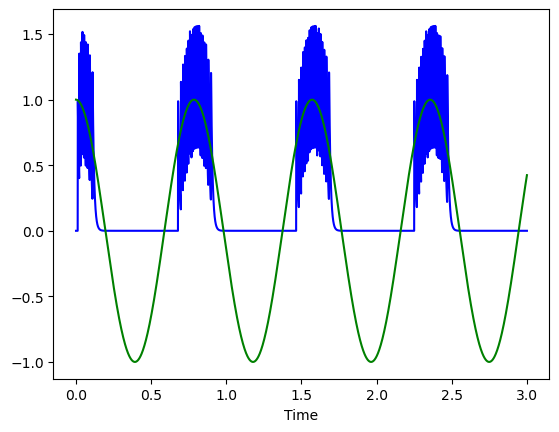

In [117]:
# %load "answers/answer_014.txt"
# Answer
#plt.subplot(111)
#plt.plot(sim.trange(), neuron_value)
#plt.plot(sim.trange(), stim_value)

#Bonus:
plt.plot(sim.trange(), neuron_value, 'b')
plt.plot(sim.trange(), stim_value, 'g')
plt.xlabel('Time')

Plot the spiking output of the ensemble using rasterplot from nengo that we imported at the beginning:

**Bonus:** Set our x and y lables to 'Time' and 'Single Neuron' respectively. Also, the plot is very crowded, how can we zoom in to just see a specific time point such as from 0.5 to 1.0s? *Hint* does plt. have anything that could help?

(0.5, 1.0)

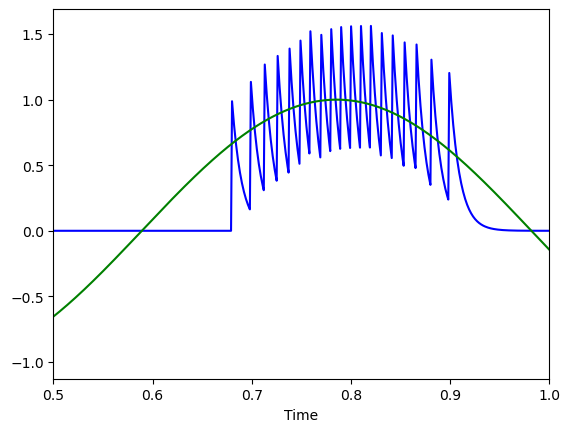

In [120]:

plt.plot(sim.trange(), neuron_value, 'b')
plt.plot(sim.trange(), stim_value, 'g')
plt.xlabel('Time')
plt.xlim(0.5,1.0)

(0.5, 1.0)

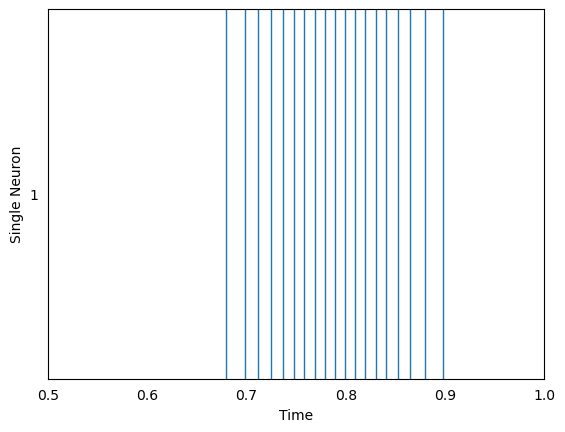

In [119]:
# %load "answers/answer_015.txt"
# Answer
plt.subplot(111)
rasterplot(sim.trange(), neuron_spikes)
plt.xlabel('Time')
plt.ylabel('Single Neuron')
plt.xlim(.5, 1.0)

Plot the soma voltages of the neurons:

**Bonus:** We want our plot to look different than the previous one. How might we specifiy a different color for this plot? Also, zoom in  to the 0.5-1.0s window again like the previous plot.

In [127]:
neuron_voltage.shape

(3000, 1)

(0.5, 1.0)

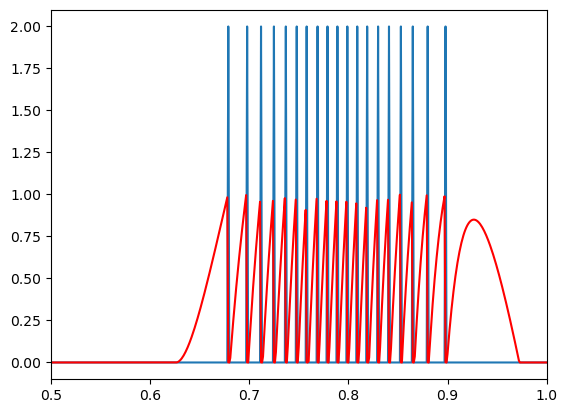

In [128]:
# %load "answers/answer_016.txt"
# Answer
plt.subplot(111)
plt.plot(sim.trange(), neuron_spikes/500)

# Bonus:
plt.plot(sim.trange(), neuron_voltage, 'r')
plt.xlim(0.5, 1.0)

The top graph shows the input signal in green and the filtered output spikes from the single neuron population in blue. The spikes (that are filtered) from the neuron are shown in the bottom graph on the left. On the right is the subthreshold voltages for the neuron.

<a id="7db5288c-bd6d-4707-a9c5-ef2a8ee35d4b"></a>
# Part 2: Simulating feedforward inhibition circuit in the cerebellar cortex
<a href="#Overview">Return to overview</a>

The input layer of the cerebellar cortex integrates diverse sensorimotor information to enable learned associations that refine the dynamics of movement. Specifically, mossy fiber afferents relay sensorimotor input from into the cerebellum to excite granule cells. Golgi cells are inhibitory interneurons found within the granular layer of the cerebellum. They also receive excitatory input from mossy fibers and synapse on granule cells, thereby causing feedforward inhibition of granule cells.

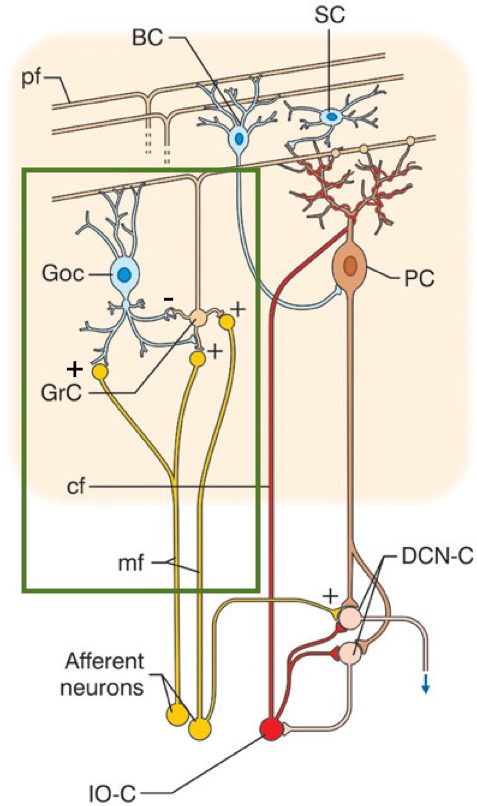

<a id="61ed97c9-e2cc-4637-aa82-a4fa5c63442a"></a>
## Exercise 7: Creating the model
<a href="#Overview">Return to overview</a>
How can we simulate such a circuit with Nengo? Well, let's first create a model called `FFI_model` and add the ensembles into the model. In this model, Golgi cells are represented by `Goc` and granule cells represented by `GC`. Let's assume there are 100 neurons for each types of cell in this circuit and only represent 1 dimesnion of information.

In [161]:
# %load "answers/answer_017.txt"
# Answer
FFI_model = nengo.Network()

with FFI_model:
    GoC = nengo.Ensemble(100, dimensions=1,label='golgi')
    GC = nengo.Ensemble(100, dimensions=1, label='granule')

In [162]:
FFI_model.all_ensembles

[<Ensemble 'golgi' at 0x15ac72120>, <Ensemble 'granule' at 0x15accbf20>]

<a id="8b75dbbe-0145-473f-b235-ff13b7460723"></a>
## Exercise 8: Provide input to the model
<a href="#Overview">Return to overview</a>

Now we have to also add a component to the model that represents mossy fibers input, which drives activity in the GC and GoC ensembles. Remember how to provide input to the model? We will call the input signal as `MF_input` and give it a constant scalar value of 1.

In [163]:
# %load "answers/answer_018.txt"
#Answer
with FFI_model:
    MF_input = nengo.Node(1)

<a id="4e598600-e7f7-4123-b146-0c96489f8b49"></a>
## Exercise 9: Connect elements in the circuit
<a href="#Overview">Return to overview</a>

Great, now we can connect the ensembles in our circuit by using `nengo.Connection()`. For example, if you want to connect ensemble A to ensemble B, type `nengo.Connection(A, B)`. Don't forget that Golgi cell is an inhibitory interneuron. To simulate an inhibitory connection, we have to take an extra step by defining a function `inhibition()` which could invert the sign of the input value. Then, we add this function into the third parameter of the nengo connection function `nengo.Connection(A, B, function=inhibition)`. Since Golgi cells usually don't completely silence granule cells, let's also add a feature in the function that could cause the output value to be reduced by half.

* define a function to invert the given value and divide it in half
* Connect our input to our golgi cell ensemble and call our funciton
* Connect our input to our granule cell ensemble
* finally connect the golgi cell ensemble to the granule cell ensemble

In [159]:
# %load "answers/answer_019.txt"
# Answer
def inhibition(x):
    return x*(-0.5)

with FFI_model:
    nengo.Connection(GoC, GC, function=inhibition)
    nengo.Connection(MF_input, GoC)
    nengo.Connection(MF_input, GC)

We can also replace the inhibition function with a lambda call:

In [164]:
# %load "answers/answer_020.txt"
# Answer
def inhibition(x):
    return x*(-0.5)

with FFI_model:
    nengo.Connection(GoC, GC, function=lambda x: x*(-0.5))
    nengo.Connection(MF_input, GoC)
    nengo.Connection(MF_input, GC)

<a id="5c7e7876-8c29-4945-a2c6-8c7a1be7c41c"></a>
## Exercise 10: Probe output
<a href="#Overview">Return to overview</a>

Awesome! We can now collect the data from the input and each ensembles. Try to create a probe for each of the circuit elements and set the `synapse` parameter to 0.01.

In [168]:
# %load "answers/answer_021.txt"
#Answer
with FFI_model:
    MF_probe = nengo.Probe(MF_input, synapse=0.03)
    GoC_probe = nengo.Probe(GoC, synapse=0.03)
    GC_probe = nengo.Probe(GC, synapse=0.03)

Okay, the model is all set! However, in order to run the model, we will also have to create a simulator. 

In [169]:
with nengo.Simulator(FFI_model) as sim:
     sim.run(1)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

<a id="2a8987fb-9bc1-4e98-8ddf-1f66ff351b34"></a>
## Exercise 11: Plotting the data
<a href="#Overview">Return to overview</a>
Finally, let's visualize our results using `matplotlib`! Remember to collect the data from the probe using `sim.data[]`. Also, don't forget to set an x label 'Time (s)'.

**Bonus exercise 1:** Add a legend to our plot to show us which trace corresponds to which ensemble. 

**Bonus exercise 2:** Norepinephrine (NE) releasing neurons in the locus coeruleus innervate the cerebellar cortex. Recently, it has been shown that NE could reduce the level of Golgi cell inhibition onto granule cell by reducing the gain of its spike frequency versus input-current relationship (Lanore et al., 2019). How can we simulate this?  Let's assume NE modulation reduces the degree of feedforward inhibition by half. To avoid messing up the data of the original model, you will have to create a new model.

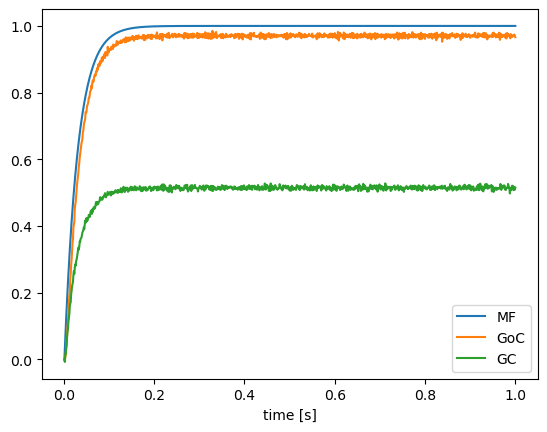

In [170]:
# %load "answers/answer_022.txt"
# Exercise 2.5 and bonus exercise 1 (optional) here:

#Answer
t = sim.trange()
plt.subplot()
plt.plot(t, sim.data[MF_probe], label="MF")
plt.plot(t, sim.data[GoC_probe], label="GoC")
plt.plot(t, sim.data[GC_probe], label="GC")
plt.xlabel('time [s]')

#Bonus exercise 1:
plt.legend()

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

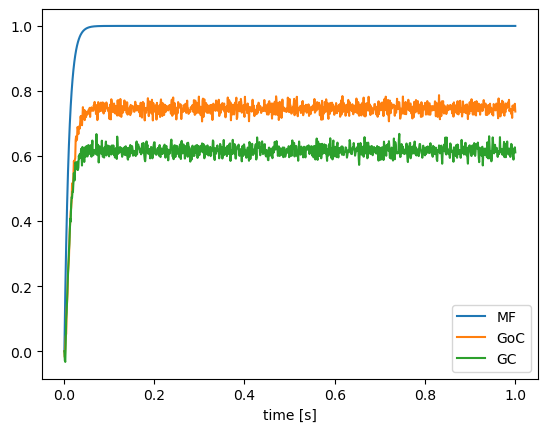

In [173]:
# %load "answers/answer_023.txt"
# Bonus exercise 2 here:
# Answer

# Create the new model
FFI_model2 = nengo.Network()

with FFI_model2:
    GoC = nengo.Ensemble(100, dimensions=1)
    GC = nengo.Ensemble(100, dimensions=1)
    MF_input = nengo.Node(1)
    NE_input = nengo.Node(-0.25)

# Connect circuit elements     
with FFI_model2:
    nengo.Connection(GoC, GC, function=inhibition)
    nengo.Connection(MF_input, GC)
    nengo.Connection(MF_input, GoC)
    nengo.Connection(NE_input, GoC)

# Probe output    
with FFI_model2:
    MF_probe = nengo.Probe(MF_input, synapse=0.01)
    GoC_probe = nengo.Probe(GoC, synapse=0.01)
    GC_probe = nengo.Probe(GC, synapse=0.01)
    
# Run simulation
with nengo.Simulator(FFI_model2) as sim:
     sim.run(1)
        
# Plot results
t = sim.trange()
plt.subplot()
plt.plot(t, sim.data[MF_probe], label="MF")
plt.plot(t, sim.data[GoC_probe], label="GoC")
plt.plot(t, sim.data[GC_probe], label="GC")
plt.legend()
plt.xlabel('time [s]');
        

<a id="eb17f014-cc8b-4ab8-886c-4dc1d8c2f642"></a>
# Part 3: Memory Circuit
<a href="#Overview">Return to overview</a>
Lastly, let's see if we can design a circuit to store information over time then probe its outputs to compare with the original signal.<br>First, let's write a function that defines an input signal of of 1 for 0 < t < 0.5s and 0 otherwise, calling it `input_func()`.

In [190]:
# %load "answers/answer_024.txt"
#Answer:
def input_func(t):
    output = ((t>=0) & (t<0.5)).astype(int)
    return output


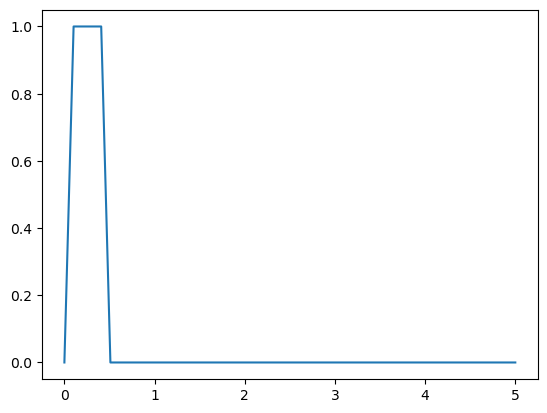

In [189]:
t=np.linspace(0,5)
x=input_func(t)
plt.plot(t,x)

In [192]:
input_func = lambda t: 1 if 0<t<0.5 else 0

In [193]:
input_func(0.6)

0

<a id="1757bc3a-b820-4e9b-97c7-3a2aa3e6185a"></a>
## Exercise 12: Making the Model
<a href="#Overview">Return to overview</a>
Now, lets create a model following the pattern we have been using. We will need 4 things:
1. A stim node connected to our `input_func` function
2. A sensory ensemble that encodes that input
3. A reccurently connected memory ensemble that stores the value
4. Probes for each ensemble

Don't forget to connect your ensembles appropriately!<br>
Name your node `stim_a`, your ensembles `sensory` and `memory` and your probes `mem_p` and `sense_p`. Also, let's set the parameter `transform` to 0.1 on the sensory to memory connection to attentuate the strength of the memory representation and set the `synapse` to 0.1 on the recurrent memory connection, creating a 100ms synaptic filter.

In [272]:
nengo.processes.WhiteNoise?

Init signature:
nengo.processes.WhiteNoise(
    dist=Gaussian(mean=0, std=1),
    scale=True,
    **kwargs,
)
Docstring:     
Full-spectrum white noise process.

Parameters
----------
dist : Distribution, optional
    The distribution from which to draw samples.
scale : bool, optional
    Whether to scale the white noise for integration. Integrating white
    noise requires using a time constant of ``sqrt(dt)`` instead of ``dt``
    on the noise term [1]_, to ensure the magnitude of the integrated
    noise does not change with ``dt``.
seed : int, optional
    Random number seed. Ensures noise will be the same each run.

References
----------
.. [1] Gillespie, D.T. (1996) Exact numerical simulation of the Ornstein-
   Uhlenbeck process and its integral. Phys. Rev. E 54, pp. 2084-91.
File:           ~/opt/anaconda3/envs/NEUS642_2024/lib/python3.12/site-packages/nengo/processes.py
Type:           type
Subclasses:     

In [292]:
# %load "answers/answer_025.txt"
#Answer:
mem_model = nengo.Network()
with mem_model:
    #process = nengo.processes.WhiteNoise(dist=nengo.dists.Gaussian(0,0.000001), seed=1)

    stim_a = nengo.Node(input_func)
    sensory = nengo.Ensemble(n_neurons=3, dimensions=1)
    nengo.Connection(stim_a, sensory)
    
    memory = nengo.Ensemble(n_neurons=50, dimensions=1)
    nengo.Connection(memory, memory, synapse=0.1)
    nengo.Connection(sensory, memory, transform=0.1)

    stim_p = nengo.Probe(stim_a)
    mem_p = nengo.Probe(memory)
    sense_p = nengo.Probe(sensory.neurons,'voltage')

Run the model for 2 seconds and collect data from the probes. Store the data in variables called `mem_output` and `sense_output`.

In [293]:
# %load "answers/answer_026.txt"
#Answer:
sim = nengo.Simulator(mem_model)
sim.run(2)

mem_output=sim.data[mem_p]
sense_output=sim.data[sense_p]
stim_output=sim.data[stim_p]

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

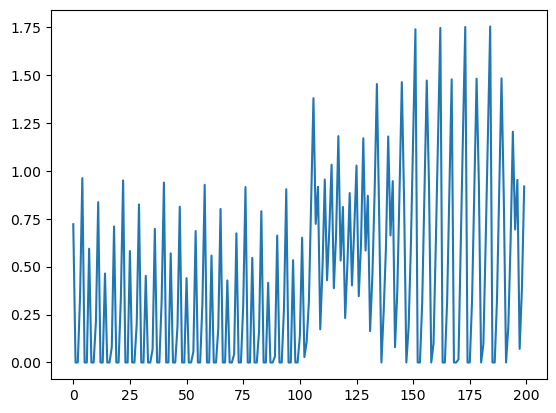

In [297]:
plt.plot(sense_output[400:600,:].sum(axis=1))

(0.0, 0.1)

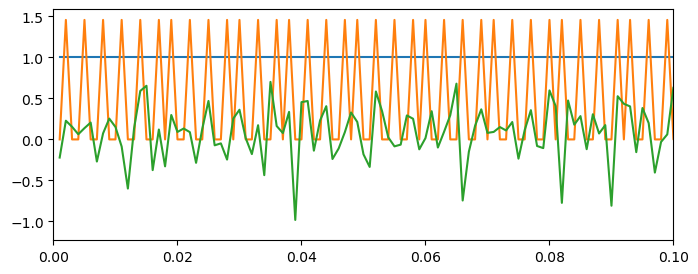

In [291]:
plt.figure(figsize=(8,3))
plt.plot(sim.trange(),stim_output)
plt.plot(sim.trange(),sense_output)

plt.plot(sim.trange(),mem_output)
plt.xlim(0,.1)

Bonus: add a second stim with its own input function. Try wiring it into the same memory ensemble or add an extra dimension for it. How does this affect the plotted outcome below? What if you merged 2 snesory dimensions into 1 memory? Remember you can consult the [nengo documentation](https://www.nengo.ai/nengo/user-guide.html) if you get stuck. Remember that if you use the same variable names you will rewrite your old data!

In [249]:
nengo.Connection?

Init signature: nengo.Connection(*args, **kwargs)
Docstring:     
Connects two objects together.

The connection between the two object is unidirectional,
transmitting information from the first argument, ``pre``,
to the second argument, ``post``.

Almost any Nengo object can act as the pre or post side of a connection.
Additionally, you can use Python slice syntax to access only some of the
dimensions of the pre or post object.

For example, if ``node`` has ``size_out=2`` and ``ensemble`` has
``size_in=1``:

.. testcode::

   with nengo.Network() as net:
       node = nengo.Node(np.zeros(2))
       ensemble = nengo.Ensemble(10, 1)

We could not create the following connection:

.. testcode::

   with net:
       nengo.Connection(node, ensemble)

.. testoutput::
   :hide:

   Traceback (most recent call last):
   ...
   nengo.exceptions.ValidationError: init: Shape of initial value () does not        match expected shape (1, 2)

But, we could create either of these two connections:

..

In [252]:
#Bonus:
def input_func_2(t):
    if 0 <t<1:
        return 4
    else:
        return 0
mem_model = nengo.Network()

with mem_model:
    
    ens_args = {"encoders": [[1,1]]*50, "intercepts": [0.01]*50, "max_rates": [100]*50}

    process = nengo.processes.WhiteNoise(dist=nengo.dists.Gaussian(0,0.000001), seed=1)
    stim_b=nengo.Node(input_func_2)
    stim_a = nengo.Node(input_func)
    sensory = nengo.Ensemble(n_neurons=50, dimensions=2, noise=process, **ens_args)
    nengo.Connection(stim_a, sensory[0])
    nengo.Connection(stim_b, sensory[1])
    
    memory = nengo.Ensemble(n_neurons=50, dimensions=1,noise=process)
    nengo.Connection(memory, memory, synapse=0.1)
    nengo.Connection(sensory[0], memory, transform=0.1)
    nengo.Connection(sensory[1], memory, transform=0.1)
    
    mem_p = nengo.Probe(memory)
    sense_p = nengo.Probe(sensory)

simB = nengo.Simulator(mem_model)
simB.run(2)

mem_output_B=simB.data[mem_p]
sense_output_B=simB.data[sense_p]

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

Text(0.5, 1.0, 'Memory Ensemble Activity')

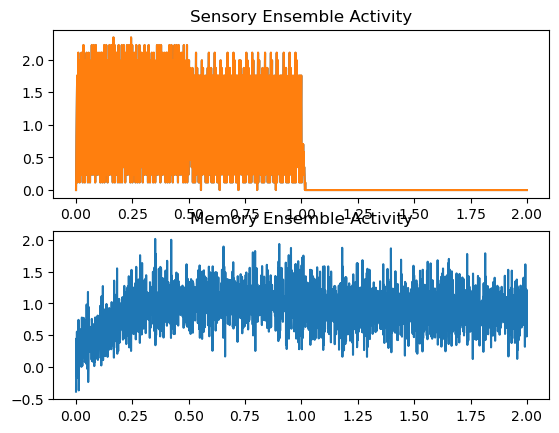

In [253]:
#If you did 3.1 Bonus:
memory_plot_B, axes_B=plt.subplots(2,1)
sense_B=axes_B[0]
sense_B.plot(sim.trange(), sense_output_B)
sense_B.set_title("Sensory Ensemble Activity")
mem_B=axes_B[1]
mem_B.plot(sim.trange(),mem_output_B)
mem_B.set_title("Memory Ensemble Activity")

<a id="00f9df0c-4ef1-461c-83c8-d8363ba51517"></a>
## Exercise 13: Plotting that data
<a href="#Overview">Return to overview</a>
Finally, it's time to plot. You know the drill. Pull out all the stops with your matplotlib savvy and show us some pretty pretty graphs of `mem_output` and `sense_output`. If you did the bonus in Exercise 3.1, make sure you plot those results as well. <br> Just for kicks and gigs, and to review `plt.subplots`, plot each graph on an axis of one subplots figure. Remember to add descriptive titles so we know what's going on!

Text(0.5, 1.0, 'Memory Ensemble Activity')

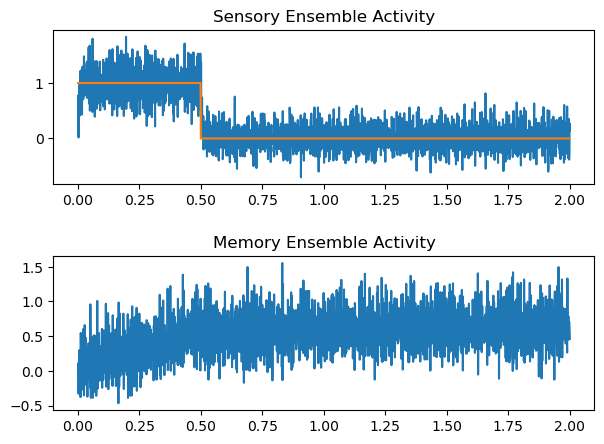

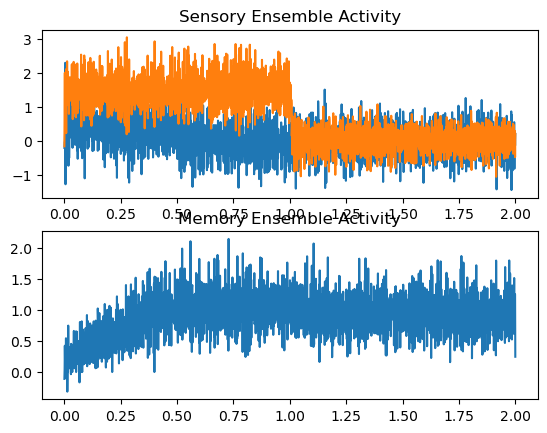

In [225]:
# %load "answers/answer_027.txt"
#Answer:
memory_plot, axes=plt.subplots(2,1)
sense=axes[0]
sense.plot(sim.trange(), sense_output)
sense.set_title("Sensory Ensemble Activity")
sense.plot(sim.trange(), stim_output)
mem=axes[1]
mem.plot(sim.trange(),mem_output)
mem.set_title("Memory Ensemble Activity")

memory_plot.tight_layout(pad=2.0)

#If you did 3.1 Bonus:
memory_plot_B, axes_B=plt.subplots(2,1)
sense_B=axes_B[0]
sense_B.plot(sim.trange(), sense_output_B)
sense_B.set_title("Sensory Ensemble Activity")
mem_B=axes_B[1]
mem_B.plot(sim.trange(),mem_output_B)
mem_B.set_title("Memory Ensemble Activity")

You may find that your subplot titles and/or axes titles are writing over eachother. Look into matplotlib's figure.tight_layout() to see if you can remedy this.
Bonus:
Assign one color to each ensemble from the html color browser and use it here and for all future plots. Then add bars to your plots to show the stimulus presentation time. Hint: your spiking data is binned by ms.

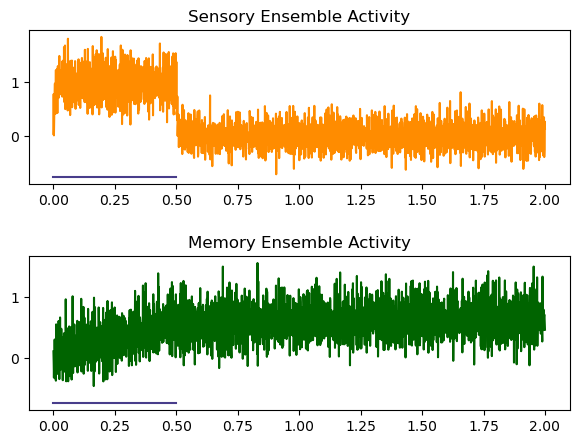

In [208]:
#Bonus:
memory_plot, axes=plt.subplots(2,1)
sense=axes[0]
sense.plot(sim.trange(), sense_output, np.arange(0,0.5, .001), np.full((500,1),-0.75))
sense.set_title("Sensory Ensemble Activity")
sense.lines[0].set_color('#FF8C00')
sense.lines[1].set_color('#483D8B')
mem=axes[1]
mem.plot(sim.trange(),mem_output, np.arange(0,0.5, .001), np.full((500,1),-0.75))
mem.lines[0].set_color('#006400')
mem.lines[1].set_color('#483D8B')
mem.set_title("Memory Ensemble Activity")

memory_plot.tight_layout(pad=2.0)